<a href="https://colab.research.google.com/github/SPlearning27/DDDS-My-Projects/blob/main/Project-3/%20SP_Project3__SQL_1_Chinook_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook




*   The Chinook data model represents a digital media store,
*   The entity relationship diagram (ERD) including 11 tables for artists, albums, media tracks, invoices, customers, etc.
*   Data collection: January 2009 - December 2013



## Material resources:

The [Chinook sample](https://www.sqlitetutorial.net/sqlite-sample-database/)

- Zip file of [sqlite DB](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip)

- [ER diagram](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/sqlite-sample-database-diagram-color.pdf)

- [ER symbols/meanings](https://d2slcw3kip6qmk.cloudfront.net/marketing/pages/chart/erd-symbols/ERD-Notation.PNG)

- [Draw IO](https://app.diagrams.net/) for creating ER diagrams, flowcharts, etc.

## Chinook sample database

- To set up the Chinook dataset


In [ ]:
# install sqlite3
import sqlite3 as db
import pandas as pd

In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
!sqlite3 --help

Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [ ]:
!rm -f chinook.db


In [ ]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [ ]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Jun 30 19:22 .
drwxr-xr-x 1 root root   4096 Jun 30 13:13 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Jun 30 13:17 chinook.zip
drwxr-xr-x 4 root root   4096 Jun 26 13:34 .config
drwxr-xr-x 1 root root   4096 Jun 26 13:35 sample_data


In [ ]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables


albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [ ]:
# Show the schema for the entire database
%%script sqlite3 --column --header chinook.db
.schema


CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

In [ ]:
# Connect to a sqlite database and load a result set into a data frame
db_con = db.connect("chinook.db")

# Questions about this Chinook dataset
1. Which invoice ID had the highest sale?
2. How much was the maximum total sale price?
3. Which track names in which albums were purchased in the invoice ID# 404?
4. Which album ID was purchased the most?
5. What was the title of this album?
6. Who was the artist of the album ID# 230?
7. What were genres and types of media purchased in the invoice ID #404?
8. How many tracks were included in one album?
9. How much was the total sales in each country per day?
10.Which album was the most popular? and what were the genres of each album?



## Basic Queries


#### SELECT (with * and with column names)


In [ ]:
# Select the first 10 entries from the invoice_items table
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoice_items
limit 20


InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity
-------------  ---------  -------  ---------  --------
1              1          2        0.99       1       
2              1          4        0.99       1       
3              2          6        0.99       1       
4              2          8        0.99       1       
5              2          10       0.99       1       
6              2          12       0.99       1       
7              3          16       0.99       1       
8              3          20       0.99       1       
9              3          24       0.99       1       
10             3          28       0.99       1       
11             3          32       0.99       1       
12             3          36       0.99       1       
13             4          42       0.99       1       
14             4          48       0.99       1       
15             4          54       0.99       1       
16             4          60       0.99       1       
17        

- From the table above, there are many TrackId in one InvoiceId.

## Question 1:
- Which trackID was the best selling track?

Ans: There was not the best selling track ID because there were two groups of the trackID based on the counted numbers that are either 1 or 2 as the maximum track ID included in teh invoiceId.

In [ ]:
# See the count of each Track ID
%%script sqlite3 --column --header chinook.db
SELECT
    TrackId,
    COUNT(TrackId) AS CountNo
FROM
    invoice_items
GROUP BY
    TrackId
ORDER BY
    CountNo DESC, TrackId ASC;

TrackId  CountNo
-------  -------
2        2      
8        2      
9        2      
20       2      
32       2      
48       2      
66       2      
84       2      
161      2      
162      2      
171      2      
175      2      
184      2      
198      2      
207      2      
211      2      
217      2      
229      2      
234      2      
240      2      
241      2      
252      2      
264      2      
280      2      
298      2      
316      2      
393      2      
394      2      
403      2      
407      2      
416      2      
430      2      
439      2      
443      2      
449      2      
461      2      
466      2      
472      2      
473      2      
484      2      
496      2      
512      2      
530      2      
548      2      
625      2      
626      2      
635      2      
639      2      
648      2      
662      2      
671      2      
675      2      
681      2      
693      2      
698      2      
704      2      
705      2    

In [ ]:
# Concatenate all TrackId values associated with a single InvoiceId into a single string
%%script sqlite3 --column --header chinook.db
SELECT
    InvoiceId,
    GROUP_CONCAT(TrackId, ' | ') AS MergedTrackIds -- Using ' | ' as separator
FROM
    invoice_items
GROUP BY
    InvoiceId;

InvoiceId  MergedTrackIds                                                                                 
---------  -----------------------------------------------------------------------------------------------
1          2 | 4                                                                                          
2          6 | 8 | 10 | 12                                                                                
3          16 | 20 | 24 | 28 | 32 | 36                                                                    
4          42 | 48 | 54 | 60 | 66 | 72 | 78 | 84 | 90                                                     
5          99 | 108 | 117 | 126 | 135 | 144 | 153 | 162 | 171 | 180 | 189 | 198 | 207 | 216               
6          230                                                                                            
7          231 | 232                                                                                      
8          234 | 236                 

In [ ]:
# Organize the same invoiceId values with the sum of Quantity and of UnitPrice
%%script sqlite3 --column --header chinook.db
  SELECT
  InvoiceId,
    SUM(Quantity) AS TotalQuantity,
    SUM(UnitPrice) AS TotalPrice
  FROM invoice_items
  GROUP BY InvoiceId
  ;


InvoiceId  TotalQuantity  TotalPrice
---------  -------------  ----------
1          2              1.98      
2          4              3.96      
3          6              5.94      
4          9              8.91      
5          14             13.86     
6          1              0.99      
7          2              1.98      
8          2              1.98      
9          4              3.96      
10         6              5.94      
11         9              8.91      
12         14             13.86     
13         1              0.99      
14         2              1.98      
15         2              1.98      
16         4              3.96      
17         6              5.94      
18         9              8.91      
19         14             13.86     
20         1              0.99      
21         2              1.98      
22         2              1.98      
23         4              3.96      
24         6              5.94      
25         9              8.91      
2

In [ ]:
# Select the invoice IDs that have the total quantity of 14
# Filter the total price more than $13.86 (~14) as the majority of the invoice IDs with the total quantity of 14 have the total price of $13.86
%%script sqlite3 --column --header chinook.db
  SELECT
    InvoiceId, TotalQuantity, TotalPrice
  FROM ( SELECT InvoiceId,
        SUM(Quantity) AS TotalQuantity,
        SUM(UnitPrice) AS TotalPrice
        FROM invoice_items
        GROUP BY InvoiceId)
  WHERE TotalQuantity between 14 AND TotalPrice > 14
  ;

## Question 2
- Whcih invoiceId did make the most sale?

Ans: InvoiceID 404 made $25.86 as the maximum sale price.

In [ ]:
# Find the invoice_ID of the maximum total sale price
%%script sqlite3 --column --header chinook.db
  SELECT
    InvoiceId, MAX(TotalPrice)
  FROM ( SELECT InvoiceId,
        SUM(UnitPrice) AS TotalPrice
        FROM invoice_items
        GROUP BY InvoiceId)
  ;

InvoiceId  MAX(TotalPrice)
---------  ---------------
404        25.86          


In [ ]:
# Extract the trackIDs listed on these invoice IDs
%%script sqlite3 --column --header chinook.db
SELECT [TrackId]
FROM invoice_items
WHERE InvoiceId = 404

TrackId
-------
2814   
2823   
2832   
2841   
2850   
2859   
2868   
2877   
2886   
2895   
2904   
2913   
2922   
2931   


In [ ]:
# explicitly close the connection
db_con.close()

In [ ]:
# Concatenate all TrackId values associated with a single InvoiceId into a single string
%%script sqlite3 --column --header chinook.db
SELECT
  InvoiceId,
  GROUP_CONCAT(TrackId, ' | ') AS MergedTrackIds -- Using ' | ' as separator
FROM
  invoice_items
GROUP BY
  InvoiceId;

InvoiceId  MergedTrackIds                                                                                 
---------  -----------------------------------------------------------------------------------------------
1          2 | 4                                                                                          
2          6 | 8 | 10 | 12                                                                                
3          16 | 20 | 24 | 28 | 32 | 36                                                                    
4          42 | 48 | 54 | 60 | 66 | 72 | 78 | 84 | 90                                                     
5          99 | 108 | 117 | 126 | 135 | 144 | 153 | 162 | 171 | 180 | 189 | 198 | 207 | 216               
6          230                                                                                            
7          231 | 232                                                                                      
8          234 | 236                 

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
  from tracks
  limit 20


TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer                                                                Milliseconds  Bytes     UnitPrice
-------  ---------------------------------------  -------  -----------  -------  ----------------------------------------------------------------------  ------------  --------  ---------
1        For Those About To Rock (We Salute You)  1        1            1        Angus Young, Malcolm Young, Brian Johnson                               343719        11170334  0.99     
2        Balls to the Wall                        2        2            1                                                                                342562        5510424   0.99     
3        Fast As a Shark                          3        2            1        F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman                     230619        3990994   0.99     
4        Restless and Wild                        3        2     

In [ ]:
# Use Inner join query to join two tables of invoice_items&tracks where there are matching records in both tables
# Create a new data frame named invoice_total_df

query_inv_tck = '''
  SELECT *
  FROM invoice_items
  INNER JOIN tracks
  ON invoice_items.TrackId = tracks.TrackId
;
'''
print(query_inv_tck)



  SELECT *
  FROM invoice_items
  INNER JOIN tracks
  ON invoice_items.TrackId = tracks.TrackId
;



In [ ]:
with db.connect("chinook.db") as db_con:
  tables_inv_tck = pd.read_sql_query( query_inv_tck , db_con)

tables_inv_tck

InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity  TrackId  \
0                 1          1        2       0.99         1        2   
1                 2          1        4       0.99         1        4   
2                 3          2        6       0.99         1        6   
3                 4          2        8       0.99         1        8   
4                 5          2       10       0.99         1       10   
...             ...        ...      ...        ...       ...      ...   
2235           2236        411     3136       0.99         1     3136   
2236           2237        411     3145       0.99         1     3145   
2237           2238        411     3154       0.99         1     3154   
2238           2239        411     3163       0.99         1     3163   
2239           2240        412     3177       1.99         1     3177   

                                                   Name  AlbumId  MediaTypeId  \
0                                     Balls to the Wall        2            2   
1                                     Restless and Wild        3            2   
2                                 Put The Finger On You        1            1   
3                                      Inject The Venom        1            1   
4                                            Evil Walks        1            1   
...                                                 ...      ...          ...   
2235                                   Looking For Love      141            1   
2236                                    Sweet Lady Luck      141            1   
2237  Feirinha da Pavuna/Luz do Repente/Bagaço da La...      248            1   
2238                                   Samba pras moças      248            1   
2239                                           Hot Girl      249            3   

      GenreId                                           Composer  \
0           1                                               None   
1           1  F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...   
2           1          Angus Young, Malcolm Young, Brian Johnson   
3           1          Angus Young, Malcolm Young, Brian Johnson   
4           1          Angus Young, Malcolm Young, Brian Johnson   
...       ...                                                ...   
2235        3                                              Sykes   
2236        3                                         Vandenberg   
2237        7  Arlindo Cruz/Franco/Marquinhos PQD/Negro, Jove...   
2238        7                           Grazielle/Roque Ferreira   
2239       19                                               None   

      Milliseconds      Bytes  UnitPrice  
0           342562    5510424       0.99  
1           252051    4331779       0.99  
2           205662    6713451       0.99  
3           210834    6852860       0.99  
4           263497    8611245       0.99  
...            ...        ...        ...  
2235        391941   12769847       0.99  
2236        273737    8919163       0.99  
2237        107206    3593684       0.99  
2238        152816    5121366       0.99  
2239       1325458  267836576       1.99  

[2240 rows x 14 columns]

## Question 3
- Which track names were purchased in the invoiceId 404?

In [ ]:
# Use Inner join query to join two tables of invoice_items and tracks where there are matching records in both tables
# Where the invoiceID = 404
# to see the track names purchased in that invoice
%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoice_items
INNER JOIN tracks
ON invoice_items.TrackId = tracks.TrackId
WHERE invoice_items.invoiceId = 404
;


InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity  TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer       Milliseconds  Bytes      UnitPrice
-------------  ---------  -------  ---------  --------  -------  ---------------------------------------  -------  -----------  -------  -------------  ------------  ---------  ---------
2188           404        2814     0.99       1         2814     Insensível                               225      1            4        Sérgio Britto  207830        6893664    0.99     
2189           404        2823     1.99       1         2823     Collaborators                            227      3            19                      2626626       483484911  1.99     
2190           404        2832     1.99       1         2832     The Woman King                           227      3            18                      2626376       552893447  1.99     
2191           404        2841     1.99       1         2841     

In [ ]:
# See the count of each Track ID
%%script sqlite3 --column --header chinook.db
SELECT
  AlbumId,
  COUNT(AlbumId) AS CountAlbumId
FROM
  tracks
GROUP BY
  AlbumId
ORDER BY
  CountAlbumId DESC, AlbumId ASC;

AlbumId  CountAlbumId
-------  ------------
141      57          
23       34          
73       30          
229      26          
230      25          
251      25          
83       24          
231      24          
253      24          
24       23          
228      23          
255      23          
51       22          
224      22          
250      22          
39       21          
167      21          
37       20          
54       20          
55       20          
115      20          
221      20          
227      19          
248      19          
258      19          
21       18          
72       18          
102      18          
145      18          
146      18          
202      18          
211      18          
213      18          
18       17          
26       17          
33       17          
34       17          
36       17          
120      17          
162      17          
163      17          
185      17          
193      17          
203      1

## Question 4
- Who were the most favorite artist of this invoiceId?

### Data queries:
1. Look for what is the maximum AlbumId?
2. Join the tables of tracks and albums --> to get the ArtistId
3. Join the tables of albums and artists --> to get the name of the artist in that album
4. Look for what types of genre and media were listed in this invoiceID #404

In [ ]:
# Look for the maximum paid invoiceId
%%script sqlite3 --column --header chinook.db
SELECT
  InvoiceId, MAX(TotalPrice)
  FROM ( SELECT InvoiceId,
        SUM(UnitPrice) AS TotalPrice
        FROM invoice_items
        GROUP BY InvoiceId)
  ;


InvoiceId  MAX(TotalPrice)
---------  ---------------
404        25.86          


In [ ]:
#Cross join query to join two tables of invoice_items where the invoiceID = 404
# to see which track names were purchased in that invoice
%%script sqlite3 --column --header chinook.db

SELECT *
FROM invoice_items
INNER JOIN tracks
ON invoice_items.TrackId = tracks.TrackId
WHERE invoice_items.invoiceId = 404
;


InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity  TrackId  Name                                     AlbumId  MediaTypeId  GenreId  Composer       Milliseconds  Bytes      UnitPrice
-------------  ---------  -------  ---------  --------  -------  ---------------------------------------  -------  -----------  -------  -------------  ------------  ---------  ---------
2188           404        2814     0.99       1         2814     Insensível                               225      1            4        Sérgio Britto  207830        6893664    0.99     
2189           404        2823     1.99       1         2823     Collaborators                            227      3            19                      2626626       483484911  1.99     
2190           404        2832     1.99       1         2832     The Woman King                           227      3            18                      2626376       552893447  1.99     
2191           404        2841     1.99       1         2841     

In [ ]:
# Use Iner join to join the tracks and genres tables together
# To get genreId and mediaId
%%script sqlite3 --column --header chinook.db
SELECT
  tracks.GenreId,
  tracks.MediaTypeId
FROM tracks
INNER JOIN genres
ON genres.GenreId = tracks.GenreId
WHERE
  tracks.AlbumId >= 225 AND tracks.AlbumId < 233
GROUP BY
  tracks.GenreId,
  tracks.MediaTypeId;

GenreId  MediaTypeId
-------  -----------
1        1          
4        1          
18       3          
19       3          
20       3          
21       3          


In [ ]:
# Use Iner join to join the tracks and genres tables together
# To get genreId and mediaId
%%script sqlite3 --column --header chinook.db
SELECT
  tracks.GenreId,
  tracks.MediaTypeId
FROM tracks
INNER JOIN genres
ON genres.GenreId = tracks.GenreId
WHERE
  tracks.AlbumId BETWEEN 225 AND 232
GROUP BY
  tracks.GenreId,
  tracks.MediaTypeId;

GenreId  MediaTypeId
-------  -----------
1        1          
4        1          
18       3          
19       3          
20       3          
21       3          


In [ ]:
# Get the type of genre in all albumId in the invoiceId #404
%%script sqlite3 --column --header chinook.db
SELECT *
FROM genres
WHERE GenreId = 1 OR  GenreId = 4 OR  GenreId = 18 OR  GenreId = 19 OR  GenreId = 20 OR  GenreId = 21
;

GenreId  Name              
-------  ------------------
1        Rock              
4        Alternative & Punk
18       Science Fiction   
19       TV Shows          
20       Sci Fi & Fantasy  
21       Drama             


In [ ]:
# Get the type of media in all albumId in the invoiceId #404
%%script sqlite3 --column --header chinook.db
SELECT *
FROM media_types
WHERE MediaTypeId = 1 OR  MediaTypeId = 3
;


MediaTypeId  Name                       
-----------  ---------------------------
1            MPEG audio file            
3            Protected MPEG-4 video file


- Which AlbumId is the maximum counted albumId?

Ans: Album ID #230

In [ ]:
#Cross join query to join two tables of invoice_items
# where the invoiceID = 404
# to see which the maximum count number of albumId is

%%script sqlite3 --column --header chinook.db
SELECT
  Table2.AlbumId,
  COUNT(Table2.AlbumId) AS AlbumCount
FROM invoice_items AS Table1
INNER JOIN tracks AS Table2
  ON Table1.TrackId = Table2.TrackId
WHERE
  Table1.invoiceId = 404
GROUP BY
  Table2.AlbumId
ORDER BY
  AlbumCount DESC
LIMIT 1;

AlbumId  AlbumCount
-------  ----------
230      4         


- What is the title of that albumId and who is the artist?


In [ ]:
# Use Iner join to join the albums and artists tables together
%%script sqlite3 --column --header chinook.db
SELECT *
FROM albums
INNER JOIN artists
ON albums.ArtistId = artists.ArtistId
WHERE AlbumId = 230
;

AlbumId  Title           ArtistId  ArtistId  Name
-------  --------------  --------  --------  ----
230      Lost, Season 1  149       149       Lost


- What type of genreID and genra name of this albumID #230?

In [ ]:
# Use Iner join to join the tracks and genres tables together
# To get genreId and mediaId
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
INNER JOIN genres
ON genres.GenreId = tracks.GenreId
WHERE AlbumId = 230
;

TrackId  Name                                    AlbumId  MediaTypeId  GenreId  Composer  Milliseconds  Bytes      UnitPrice  GenreId  Name    
-------  --------------------------------------  -------  -----------  -------  --------  ------------  ---------  ---------  -------  --------
2858     Lost (Pilot, Part 1) [Premiere]         230      3            19                 2548875       217124866  1.99       19       TV Shows
2861     Lost (Pilot, Part 2)                    230      3            19                 2436583       204995876  1.99       19       TV Shows
2865     Tabula Rasa                             230      3            19                 2627105       210526410  1.99       19       TV Shows
2868     Walkabout                               230      3            19                 2587370       207748198  1.99       19       TV Shows
2871     White Rabbit                            230      3            19                 2571965       201654606  1.99       19       T

In [ ]:
# Get the name of genre of albumId #230
%%script sqlite3 --column --header chinook.db
SELECT *
FROM genres
WHERE GenreId = 19

GenreId  Name    
-------  --------
19       TV Shows


In [ ]:
# Get the type of media of albumId #230
%%script sqlite3 --column --header chinook.db
SELECT *
FROM media_types
WHERE MediaTypeId = 3

MediaTypeId  Name                       
-----------  ---------------------------
3            Protected MPEG-4 video file


## Question 5
- What is information of the customer who was a top spender of the invoiceID #404 (the most paid price)?

Ans: Helena     Holý

In [ ]:
# Use Iner join to join the invoices and customers tables together
# To get the customer name
%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
INNER JOIN invoices AS customersinvoices
ON customers.CustomerId = customersinvoices.CustomerId
INNER JOIN invoice_items AS customersinvoiceitems
ON customersinvoices.InvoiceId = customersinvoiceitems.InvoiceId
WHERE customersinvoices.InvoiceId = 404
;

CustomerId  FirstName  LastName  Company  Address        City    State  Country         PostalCode  Phone             Fax  Email            SupportRepId  InvoiceId  CustomerId  InvoiceDate          BillingAddress  BillingCity  BillingState  BillingCountry  BillingPostalCode  Total  InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity
----------  ---------  --------  -------  -------------  ------  -----  --------------  ----------  ----------------  ---  ---------------  ------------  ---------  ----------  -------------------  --------------  -----------  ------------  --------------  -----------------  -----  -------------  ---------  -------  ---------  --------
6           Helena     Holý               Rilská 3174/6  Prague         Czech Republic  14300       +420 2 4177 0449       hholy@gmail.com  5             404        6           2013-11-13 00:00:00  Rilská 3174/6   Prague                     Czech Republic  14300              25.86  2188           404        2814     0.99  

## Question 6
- Which employee was in charge of the customers in Prague at the postal code area of 14300?


Ans: None of employees located in Czech Republic.

In [ ]:
# Use Iner join to join the customers and employees tables together
# To get the employee information in the selected customer area from invoice ID 404
%%script sqlite3 --column --header chinook.db
SELECT *
FROM employees
INNER JOIN customers
ON employees.Country = customers.Country
WHERE employees.Country = 'Czech Republic' AND employees.PostalCode = 14300
;

In [ ]:
# Look for the maximum chosen albumId
%%script sqlite3 --column --header chinook.db
SELECT
AlbumId, CountAlbumId
FROM ( SELECT AlbumId,
        COUNT(AlbumId) AS CountAlbumId
        FROM tracks
        GROUP BY AlbumId)
WHERE CountAlbumId BETWEEN 30 AND 60
  ;


AlbumId  CountAlbumId
-------  ------------
23       34          
73       30          
141      57          


In [ ]:
# Use Iner join to join the tracks and albums tables together
%%script sqlite3 --column --header chinook.db
SELECT *
FROM albums
INNER JOIN tracks
ON albums.AlbumId = tracks.AlbumId
;


AlbumId  Title                                                                                            ArtistId  TrackId  Name                                                                                                                         AlbumId  MediaTypeId  GenreId  Composer                                                                                                                                                                                      Milliseconds  Bytes       UnitPrice
-------  -----------------------------------------------------------------------------------------------  --------  -------  ---------------------------------------------------------------------------------------------------------------------------  -------  -----------  -------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------  --------

In [ ]:
# Merge Title and ArtistId onto the same AlbumId
%%script sqlite3 --column --header chinook.db
SELECT
    AlbumId,
    -- First, concatenate Title and ArtistId for each row using '||'
    -- Then, GROUP_CONCAT these combined strings for each AlbumId group
    GROUP_CONCAT(Title || ' (ArtistId: ' || ArtistId || ')', ' | ') AS AlbumDetails
FROM
    albums
GROUP BY
    AlbumId;

AlbumId  AlbumDetails                                                                                                   
-------  ---------------------------------------------------------------------------------------------------------------
1        For Those About To Rock We Salute You (ArtistId: 1)                                                            
2        Balls to the Wall (ArtistId: 2)                                                                                
3        Restless and Wild (ArtistId: 2)                                                                                
4        Let There Be Rock (ArtistId: 1)                                                                                
5        Big Ones (ArtistId: 3)                                                                                         
6        Jagged Little Pill (ArtistId: 4)                                                                               
7        Facelift (ArtistId: 5) 

## Question 7
- Which country did employees locate?

##### To get more information about employees

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM employees;

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

In [ ]:
# Get a unique list of country where the employees were located
%%script sqlite3 --column --header chinook.db
SELECT DISTINCT country
FROM employees;

Country
-------
Canada 


In [ ]:
# Get a list of countries where the employees were located
%%script sqlite3 --column --header chinook.db
SELECT employees.employeeId, employees.Country
FROM employees
GROUP BY employees.employeeId
;

EmployeeId  Country
----------  -------
1           Canada 
2           Canada 
3           Canada 
4           Canada 
5           Canada 
6           Canada 
7           Canada 
8           Canada 


In [ ]:
# Get a list of cities where the employees were located
%%script sqlite3 --column --header chinook.db
SELECT city
FROM employees;

City      
----------
Edmonton  
Calgary   
Calgary   
Calgary   
Calgary   
Calgary   
Lethbridge
Lethbridge


In [ ]:
# Get a list of cities where the employees were located
%%script sqlite3 --column --header chinook.db
SELECT ReportsTo
FROM employees;

ReportsTo
---------
         
1        
1        
2        
2        
2        
6        
6        


## Question 8: Customers in Canada
- All about sales only loated in Canada

### 8.1 Maximun amount of total bills in Canada

- What was the maximum total sale in Canada and from which InvoiceId?

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT MAX(Total)
FROM invoices
WHERE BillingCountry = 'Canada'
;


MAX(Total)
----------
13.86     


In [ ]:
# To select only InvoiceId in Canada with the total of $13.86
%%script sqlite3 --column --header chinook.db
SELECT InvoiceId
FROM invoices
WHERE BillingCountry = 'Canada' AND Total = 13.86
;


InvoiceId
---------
47       
61       
110      
159      
180      
278      
362      
376      


### 8.2 Genres in Canada

- What types of genre did customers in Canada prefer?


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
INNER JOIN invoice_items
ON tracks.TrackId = invoice_items.TrackId
WHERE invoice_items.InvoiceId = 47
;

TrackId  Name                      AlbumId  MediaTypeId  GenreId  Composer                                           Milliseconds  Bytes     UnitPrice  InvoiceLineId  InvoiceId  TrackId  UnitPrice  Quantity
-------  ------------------------  -------  -----------  -------  -------------------------------------------------  ------------  --------  ---------  -------------  ---------  -------  ---------  --------
1491     Stone Free                120      1            1        Jimi Hendrix                                       216293        7002331   0.99       250            47         1491     0.99       1       
1500     Satch Boogie              121      2            1                                                           193560        3300654   0.99       251            47         1500     0.99       1       
1509     Salve Simpatia            122      1            7                                                           343484        11314756  0.99       252            47   

In [ ]:
# To get the GenreId of the customers billing country in Canada with the total of $13.86 (using DISTINC to get a unique total amount of $13.86)
%%script sqlite3 --column --header chinook.db
SELECT DISTINCT
  genres.Name
FROM customers
INNER JOIN invoices AS table_invoices
  ON customers.CustomerId = table_invoices.CustomerId
INNER JOIN invoice_items AS table_invoice_items
  ON table_invoices.InvoiceId = table_invoice_items.InvoiceId
INNER JOIN tracks AS table_tracks
  ON table_invoice_items.TrackId = table_tracks.TrackId
INNER JOIN genres
  ON table_tracks.GenreId = genres.GenreId
WHERE
  customers.Country = 'Canada' AND table_invoices.Total = 13.86;

Name              
------------------
Jazz              
Rock              
Alternative & Punk
Rock And Roll     
Metal             
R&B/Soul          
Electronica/Dance 
Latin             
World             
Reggae            
Hip Hop/Rap       


### 8.3 Media types in Canada

- What types of media did customers in Canada use?


In [ ]:
# To get the MediaTypeId of the customers billing country in Canada with the total of $13.86 (using DISTINC to get a unique total amount of $13.86)
%%script sqlite3 --column --header chinook.db
SELECT DISTINCT
  media_types.Name
FROM customers
INNER JOIN invoices AS table_invoices
  ON customers.CustomerId = table_invoices.CustomerId
INNER JOIN invoice_items AS table_invoice_items
  ON table_invoices.InvoiceId = table_invoice_items.InvoiceId
INNER JOIN tracks AS table_tracks
  ON table_invoice_items.TrackId = table_tracks.TrackId
INNER JOIN media_types
  ON table_tracks.MediaTypeId = media_types.MediaTypeId
WHERE
  customers.Country = 'Canada' AND table_invoices.Total = 13.86;

Name                    
------------------------
MPEG audio file         
Protected AAC audio file


## Question 9

- Which album ID had the most counted number of albums?

In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
  AlbumId,
  GROUP_CONCAT(TrackId, ' | ') AS MergedTrackIds -- Using ' | ' as separator
FROM
  tracks
GROUP BY
  AlbumId;

AlbumId  MergedTrackIds                                                                                                                                                                                                                                                                                                                                                                                              
-------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1        1 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14                                                                                                                                         

In [ ]:
# Look for the maximum chosen albumId
%%script sqlite3 --column --header chinook.db
SELECT
AlbumId, CountAlbumId
FROM ( SELECT AlbumId,
        COUNT(AlbumId) AS CountAlbumId
        FROM tracks
        GROUP BY AlbumId)
WHERE CountAlbumId BETWEEN 30 AND 60
  ;


AlbumId  CountAlbumId
-------  ------------
23       34          
73       30          
141      57          


In [ ]:
# Use Iner join to join the tracks and albums tables together
%%script sqlite3 --column --header chinook.db
SELECT *
FROM albums
INNER JOIN tracks
ON albums.AlbumId = tracks.AlbumId
;


AlbumId  Title                                                                                            ArtistId  TrackId  Name                                                                                                                         AlbumId  MediaTypeId  GenreId  Composer                                                                                                                                                                                      Milliseconds  Bytes       UnitPrice
-------  -----------------------------------------------------------------------------------------------  --------  -------  ---------------------------------------------------------------------------------------------------------------------------  -------  -----------  -------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ------------  --------

In [ ]:
# Merge Title and ArtistId onto the same AlbumId
%%script sqlite3 --column --header chinook.db
SELECT
    AlbumId,
    -- First, concatenate Title and ArtistId for each row using '||'
    -- Then, GROUP_CONCAT these combined strings for each AlbumId group
    GROUP_CONCAT(Title || ' (ArtistId: ' || ArtistId || ')', ' | ') AS AlbumDetails
FROM
    albums
GROUP BY
    AlbumId;

AlbumId  AlbumDetails                                                                                                   
-------  ---------------------------------------------------------------------------------------------------------------
1        For Those About To Rock We Salute You (ArtistId: 1)                                                            
2        Balls to the Wall (ArtistId: 2)                                                                                
3        Restless and Wild (ArtistId: 2)                                                                                
4        Let There Be Rock (ArtistId: 1)                                                                                
5        Big Ones (ArtistId: 3)                                                                                         
6        Jagged Little Pill (ArtistId: 4)                                                                               
7        Facelift (ArtistId: 5) 

- Who was the artist of AlbumId 141 which had the most album lists?

In [ ]:
# Find the ArtistId with the most albums
%%script sqlite3 --column --header chinook.db
SELECT
    ArtistId,
    COUNT(AlbumId) AS NumberOfAlbums
FROM
    albums
GROUP BY
    ArtistId
ORDER BY
    NumberOfAlbums DESC
LIMIT 1; -- Get only the top one

ArtistId  NumberOfAlbums
--------  --------------
90        21            


- Who is the ArtistId #90?

Ans: Iron Maiden

In [ ]:
# Use Iner join to join the albums and artists tables together
%%script sqlite3 --column --header chinook.db
SELECT *
FROM artists
INNER JOIN albums
ON artists.ArtistId = albums.ArtistId
WHERE artists.ArtistId = 90
;

ArtistId  Name         AlbumId  Title                            ArtistId
--------  -----------  -------  -------------------------------  --------
90        Iron Maiden  94       A Matter of Life and Death       90      
90        Iron Maiden  95       A Real Dead One                  90      
90        Iron Maiden  96       A Real Live One                  90      
90        Iron Maiden  97       Brave New World                  90      
90        Iron Maiden  98       Dance Of Death                   90      
90        Iron Maiden  99       Fear Of The Dark                 90      
90        Iron Maiden  100      Iron Maiden                      90      
90        Iron Maiden  101      Killers                          90      
90        Iron Maiden  102      Live After Death                 90      
90        Iron Maiden  103      Live At Donington 1992 (Disc 1)  90      
90        Iron Maiden  104      Live At Donington 1992 (Disc 2)  90      
90        Iron Maiden  105      No Pra

## Question 10: Total Sales

In [ ]:
# Select the total sales from the invoices table
%%script sqlite3 --column --header chinook.db
SELECT SUM(Total)
FROM invoices

SUM(Total)
----------
2328.6    


In [ ]:
# Select the maximum sale from the invoices table
%%script sqlite3 --column --header chinook.db
SELECT MAX(Total)
FROM invoices

MAX(Total)
----------
25.86     


In [ ]:
# Select the minimum sale from the invoices table
%%script sqlite3 --column --header chinook.db
SELECT MIN(Total)
FROM invoices

MIN(Total)
----------
0.99      


In [ ]:
# Select the average sale from the invoices table
%%script sqlite3 --column --header chinook.db
SELECT AVG(Total)
FROM invoices

AVG(Total)      
----------------
5.65194174757282


In [ ]:
# Select the total sale each month from the invoices table
%%script sqlite3 --column --header chinook.db
SELECT InvoiceDate
FROM invoices

InvoiceDate        
-------------------
2009-01-01 00:00:00
2009-01-02 00:00:00
2009-01-03 00:00:00
2009-01-06 00:00:00
2009-01-11 00:00:00
2009-01-19 00:00:00
2009-02-01 00:00:00
2009-02-01 00:00:00
2009-02-02 00:00:00
2009-02-03 00:00:00
2009-02-06 00:00:00
2009-02-11 00:00:00
2009-02-19 00:00:00
2009-03-04 00:00:00
2009-03-04 00:00:00
2009-03-05 00:00:00
2009-03-06 00:00:00
2009-03-09 00:00:00
2009-03-14 00:00:00
2009-03-22 00:00:00
2009-04-04 00:00:00
2009-04-04 00:00:00
2009-04-05 00:00:00
2009-04-06 00:00:00
2009-04-09 00:00:00
2009-04-14 00:00:00
2009-04-22 00:00:00
2009-05-05 00:00:00
2009-05-05 00:00:00
2009-05-06 00:00:00
2009-05-07 00:00:00
2009-05-10 00:00:00
2009-05-15 00:00:00
2009-05-23 00:00:00
2009-06-05 00:00:00
2009-06-05 00:00:00
2009-06-06 00:00:00
2009-06-07 00:00:00
2009-06-10 00:00:00
2009-06-15 00:00:00
2009-06-23 00:00:00
2009-07-06 00:00:00
2009-07-06 00:00:00
2009-07-07 00:00:00
2009-07-08 00:00:00
2009-07-11 00:00:00
2009-07-16 00:00:00
2009-07-24 00:00:00


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT BillingCity, MAX(Total)
FROM invoices;


BillingCity  MAX(Total)
-----------  ----------
Prague       25.86     


In [ ]:
# Select the invoiceID with the maximum total amount
%%script sqlite3 --column --header chinook.db
SELECT
  MAX(Total)
FROM invoices;


MAX(Total)
----------
25.86     


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
  InvoiceId, MAX(TotalPrice)
FROM ( SELECT InvoiceId,
      SUM(UnitPrice) AS TotalPrice
      FROM invoice_items
      GROUP BY InvoiceId)
  ;

InvoiceId  MAX(TotalPrice)
---------  ---------------
404        25.86          


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
  MIN(Total)
FROM invoices;


MIN(Total)
----------
0.99      


In [ ]:
%%script sqlite3 --column --header chinook.db
SELECT
  InvoiceId, MIN(TotalPrice)
FROM ( SELECT InvoiceId,
      SUM(UnitPrice) AS TotalPrice
      FROM invoice_items
      GROUP BY InvoiceId)
  ;

InvoiceId  MIN(TotalPrice)
---------  ---------------
6          0.99           


In [ ]:
  %%script sqlite3 --column --header chinook.db
  SELECT
    InvoiceId, SUM(TotalPrice)
  FROM ( SELECT InvoiceId,
        SUM(UnitPrice) AS TotalPrice
        FROM invoice_items
        GROUP BY InvoiceId)
  ;

InvoiceId  SUM(TotalPrice)
---------  ---------------
1          2328.6         


In [ ]:
%%script sqlite3 --column --header chinook.db
  SELECT
    InvoiceId, AVG(TotalPrice)
  FROM ( SELECT InvoiceId,
        SUM(UnitPrice) AS TotalPrice
        FROM invoice_items
        GROUP BY InvoiceId)
  ;

InvoiceId  AVG(TotalPrice) 
---------  ----------------
1          5.65194174757282


## Question 11: Information about the Employees and the Total Sales

In [ ]:
# Select the information from the employees table
%%script sqlite3 --column --header chinook.db
SELECT *
FROM employees

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

In [ ]:
# Select the information about SupportRepId from the customers table
%%script sqlite3 --column --header chinook.db
SELECT SupportRepId
FROM customers

SupportRepId
------------
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
3           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
4           
5           
5           
5           
5           
5           
5           
5           
5           
5           
5           
5           
5           
5           
5           
5           
5           
5           
5           


### Question 11.1
- How many customers did report to the employees?

In [ ]:
# See how many customers did report to each employee?
# Join the customers and employees tables through SupportRepId from both tables
%%script sqlite3 --column --header chinook.db
SELECT
  SupportRepId,
  COUNT(SupportRepId) AS ' Total Customer Supports'
FROM
  customers
GROUP BY
  SupportRepId
ORDER BY
  SupportRepId ASC;

SupportRepId   Total Customer Supports
------------  ------------------------
3             21                      
4             20                      
5             18                      


### Question 11.2

- How much did each support sales agent make in total?

In [ ]:
# How much did each support sale agent make in total?
%%script sqlite3 --column --header chinook.db
SELECT employees.EmployeeId AS "Employee ID",
  employees.FirstName ||' '|| employees.LastName AS "Support Sale Agent",
  employees.HireDate AS "Start Date",
  ROUND(SUM(table_customersinvoices.Total), 2) AS "Total Sales"
FROM employees
JOIN customers AS table_reports
  ON employees.EmployeeId = table_reports.SupportRepId
JOIN invoices AS table_customersinvoices
  ON table_reports.CustomerId = table_customersinvoices.CustomerId
WHERE employees.Title = "Sales Support Agent"
GROUP BY
  employees.EmployeeId,
  employees.FirstName,
  employees.LastName,
  employees.HireDate
ORDER BY
  "Employee ID" ASC;
;

Employee ID  Support Sale Agent  Start Date           Total Sales
-----------  ------------------  -------------------  -----------
3            Jane Peacock        2002-04-01 00:00:00  833.04     
4            Margaret Park       2003-05-03 00:00:00  775.4      
5            Steve Johnson       2003-10-17 00:00:00  720.16     


#Data Visualization

1. Total sales in each country visualized through the invoice dates.
2. The popularity of each album visualized through the genres



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
# Calculate the total sale of each invoice date
# Create a new data frame named invoice_total_df
query_1 = '''
SELECT InvoiceId AS "Invoice ID",
  invoices.InvoiceDate AS "Invoice Date",
  BillingCountry AS "Country",
  ROUND(SUM(invoices.Total), 2) AS "Total Sales"
FROM invoices
GROUP BY
  invoices.InvoiceDate
ORDER BY
  invoices.InvoiceDate ASC
;
'''
sales_total_df = pd.read_sql_query(query_1, db_con)
sales_total_df

Invoice ID         Invoice Date   Country  Total Sales
0             1  2009-01-01 00:00:00   Germany         1.98
1             2  2009-01-02 00:00:00    Norway         3.96
2             3  2009-01-03 00:00:00   Belgium         5.94
3             4  2009-01-06 00:00:00    Canada         8.91
4             5  2009-01-11 00:00:00       USA        13.86
..          ...                  ...       ...          ...
349         408  2013-12-05 00:00:00       USA         3.96
350         409  2013-12-06 00:00:00    Canada         5.94
351         410  2013-12-09 00:00:00  Portugal         8.91
352         411  2013-12-14 00:00:00   Finland        13.86
353         412  2013-12-22 00:00:00     India         1.99

[354 rows x 4 columns]

In [ ]:
fig = px.choropleth(
    sales_total_df,
    color="Total Sales",
    hover_name="Invoice Date",
    hover_data="Invoice ID",
    locations="Country",
    animation_frame="Invoice Date",
    range_color=[0,30]
)
fig.show()


In [ ]:
# See the total sales in each country
# Create a new data frame named invoice_total_df
query_2 = '''
SELECT
    BillingCountry AS "Country",
    COUNT(Total) AS CountTotalSales
FROM
    invoices
GROUP BY
    BillingCountry
ORDER BY
     BillingCountry;
'''
country_total_df = pd.read_sql_query(query_2, db_con)
country_total_df


Country  CountTotalSales
0        Argentina                7
1        Australia                7
2          Austria                7
3          Belgium                7
4           Brazil               35
5           Canada               56
6            Chile                7
7   Czech Republic               14
8          Denmark                7
9          Finland                7
10          France               35
11         Germany               28
12         Hungary                7
13           India               13
14         Ireland                7
15           Italy                7
16     Netherlands                7
17          Norway                7
18          Poland                7
19        Portugal               14
20           Spain                7
21          Sweden                7
22             USA               91
23  United Kingdom               21

In [ ]:
# Sort the DataFrame by 'CountTotalSales' in descending order
# This ensures the bars are plotted from highest to lowest sales.
country_total_df_sorted = country_total_df.sort_values(by='CountTotalSales', ascending=False)

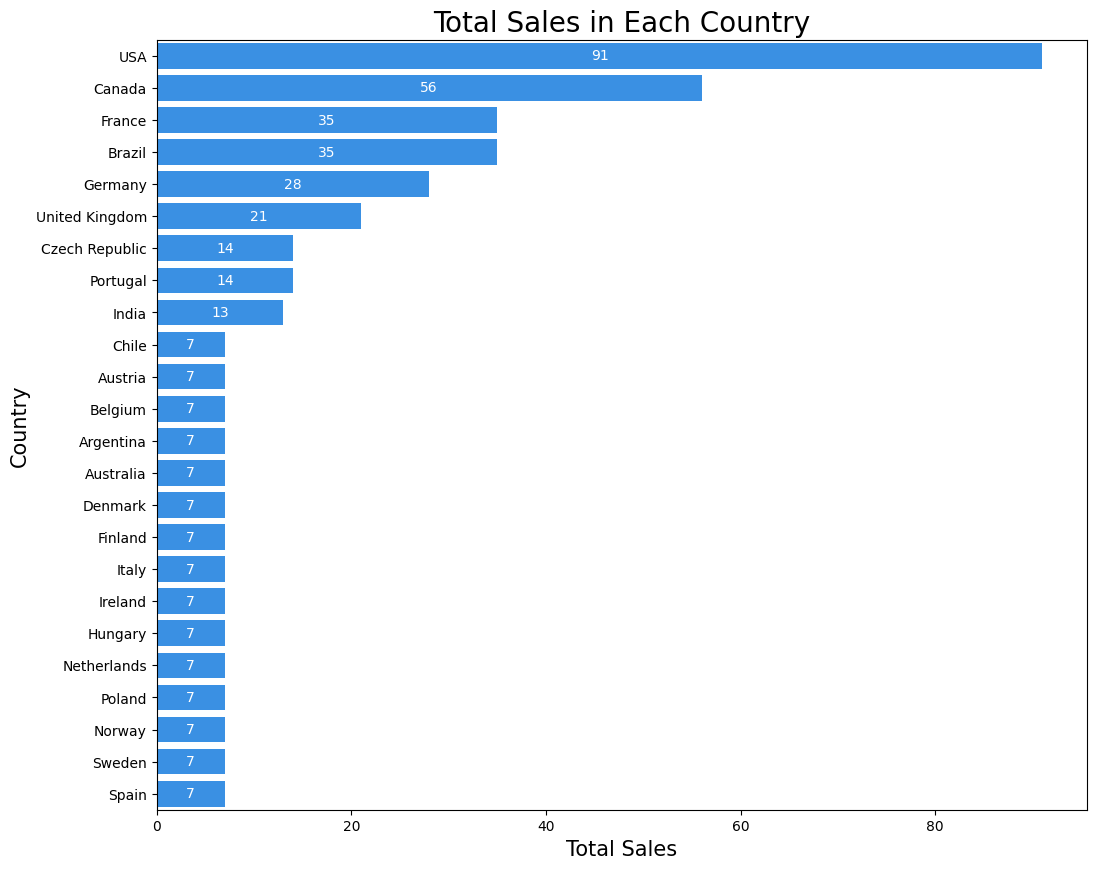

In [ ]:
# Create the horizontal bar plot of Total Sales vs Country

plt.figure(figsize=(12,10))
# Use sns.barplot for horizontal bars
# 'y' is the categorical variable (Country)
# 'x' is the numerical variable (CountTotalSales)
ax = sns.barplot(data=country_total_df_sorted, y="Country", x="CountTotalSales", color='dodgerblue')

# Add labels to the bars using ax.bar_label
# Iterate through the containers (bars) to add labels
# Format as integer, white color for visibility
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', color='white')

# Set x-axis label
plt.xlabel('Total Sales', fontsize=15)

# Set y-axis label (optional, as it's often clear from the ticks)
plt.ylabel('Country', fontsize=15)

# Plot title
plt.title('Total Sales in Each Country', fontsize=20)
plt.show();

In [ ]:
# To see the genre names in each AlbumId with the total of album ID counts
# Create a new data frame named album_genre_df
query_3 = '''
SELECT
    AlbumId,
    COUNT(AlbumId) AS "Album ID Counts",
    genres.Name AS "Genres"
FROM
    tracks
JOIN genres
ON genres.GenreId = tracks.GenreId
GROUP BY
    AlbumId,
    genres.Name
ORDER BY
    AlbumId ASC;
'''

album_genre_df = pd.read_sql_query(query_3, db_con)
album_genre_df



AlbumId  Album ID Counts      Genres
0          1               10        Rock
1          2                1        Rock
2          3                3        Rock
3          4                8        Rock
4          5               15        Rock
..       ...              ...         ...
355      343                1   Classical
356      344                1   Classical
357      345                1   Classical
358      346                1   Classical
359      347                1  Soundtrack

[360 rows x 3 columns]

In [ ]:
# Create a scatter plot to see the genres and total count of each album ID
fig = px.scatter_3d(
    album_genre_df,
    x="AlbumId",
    y="Album ID Counts",
    z="Genres",
    color="Genres",
    size="AlbumId",
    hover_name="AlbumId"
    )
fig.show()

# Challenges

*   Connecting the dots to retrieve targeted data: using JOIN query
*   Creating plots to obtain the relationship of the data values for data visualization

# References

1. Chinook database information: https://github.com/lerocha/chinook-database
2. SQL Basic cheatsheet retrieved from DataCamp: https://media.datacamp.com/legacy/image/upload/v1714149594/Marketing/Blog/SQL_for_Data_Science.pdf
3. Intro to SQL: https://www.kaggle.com/learn/intro-to-sql
4. Chinook Questions with sqlite:
https://www.kaggle.com/code/alaasedeeq/chinook-questions-with-sqlite/notebook
